tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[2., 2.],
        [2., 2.]], grad_fn=<AddBackward0>)
tensor([[6., 6.],
        [6., 6.]], grad_fn=<AddBackward0>)
tensor(24., grad_fn=<SumBackward0>)


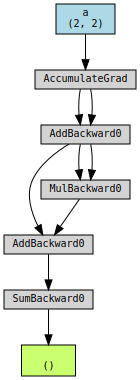

In [1]:
import gc
import torch
from torch.utils.checkpoint import checkpoint
from torchviz import make_dot, make_dot_from_trace


def func(x):
    return x * x + x


a = torch.ones((2, 2), dtype=torch.float32, requires_grad=True)
b = a + a
# c = checkpoint(func, b)
c = func(b)
d = torch.sum(c)
print(a, b, c, d, sep="\n")
make_dot(d, {"a": a})




In [3]:
for obj in gc.get_objects():
    try:
        if torch.is_tensor(obj) or (hasattr(obj, "data") and torch.is_tensor(obj.data)):
            print(obj)
    except:
        pass

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[2., 2.],
        [2., 2.]], grad_fn=<AddBackward0>)
tensor([[6., 6.],
        [6., 6.]], grad_fn=<AddBackward0>)
tensor(24., grad_fn=<SumBackward0>)
